# Libraries

Import your libraries

In [1]:
import numpy as np
import pandas as pd
import math
import statistics as cal
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, plot_confusion_matrix, confusion_matrix

# Importing Data

Import the CSV file with Actions, Sum and Div as a Dataframe called df. Fill the empty values of Action with 0. 
Replace NaN values with 0. Delete first 100 rows. 

# Preparing Data

Split the Dataframe in chunks van n/100 seconden. Combine to 1 dataframe. With Sum,Div and Action split into Train and Valid/Test. 

In [2]:
def Dataloader(CsvFile, ChunkSize, ChunkOverlap, OperationList):
#CsvFile = put in the filename(as string) example : matrix_player_15_game_2_quartersplit.csv
#ChunkSize = put in the size you want the chunks to be (in seconds) example: 1
#ChunkOverlap = the size you want the chunks to overlap (in seconds) example: 0.5
#Operationlist = input dataframe of names with operations that u want to make changes to. example:
                                #Operationlist = pd.DataFrame({'frAcc':['cal.mean'], 'wheelRotationalSpeedX':['cal.mea']})


#load in csv file
    df = pd.read_csv(CsvFile)

    chunks = [df[i:i+ChunkSize] for i in range(0,df.shape[0],ChunkOverlap)]

    frames = []

    for chunk in chunks:
        chunk = chunk.drop(columns=['Unnamed: 0'])
        frames.append(chunk)

        
    df_end =[]
    
    for frame in frames:
        if len(frame) == 100:
            result = [] #Reset the result array
            for column in list(frame.columns):
        
                if column in OperationList: #Check if column is in namelist
            
                    if OperationList[str(column)].values == 'cal.mean': #You can at more function if you want
                        X = cal.mean(frame[str(column)].tolist()) #Calculate mean of all columns named in namelist with operation cal.mean
            
                    else: #If the given operations isn't cal.mean
                        frame[str(column)] = [abs(ele) for ele in frame[str(column)]] #Get absolute value of all elements in list
                        X = max(frame[str(column)].tolist()) #Get single max value from list 
       
                else:
                    frame[str(column)] = [abs(ele) for ele in frame[str(column)]] #Get absolute value of all elements in list
                    X = max(frame[str(column)].tolist()) #Get single max value from list
            
                result.append(X) #Append results to list
        
            df_end.append(result) #Append all results into one big list
    
    df_end = pd.DataFrame(df_end, columns = list(frame.columns)) #Convert list to df
    return(df_end)
    


In [3]:
OperationList = [{ 'wheelRotationalSpeedX' : ['Cal.mean']}]
df = pd.read_csv('Player_15_Game2_Sprints_Q124_V2.csv')
#print(Dataloader('matrix_Player_15_game_2_QuarterSplit.csv', 100, 50, OperationList))

In [4]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,frAcc,frRoAcc,frDispl,...,frameRotationalSpeedY,frameRotationalSpeedZ,wheelRotationalSpeedX,wheelRotationalSpeedY,wheelRotationalSpeedZ,frRoSpeed,Filt_WheelX,Filt_FrameZ,Action,Quarter
0,0,0,0,0,0,0,0,19.69000,2828.9,3410.8,...,19.7400,228.7000,84.7310,193.7800,108.4800,2456.100,67.674366,204.464236,0.0,1
1,1,1,1,1,1,1,1,22.80600,2828.8,3391.0,...,19.7400,228.7000,113.6100,193.7800,108.4800,2456.100,77.254375,204.540434,0.0,1
2,2,2,2,2,2,2,2,22.80600,2828.5,3313.6,...,8.3300,107.7900,159.6700,92.5400,55.6290,1530.100,112.519339,204.540434,0.0,1
3,3,3,3,3,3,3,3,13.70100,2829.1,3280.3,...,7.9100,85.2600,288.6700,73.2430,55.6290,1530.100,143.311081,60.639928,0.0,1
4,4,4,4,4,4,4,4,14.08900,2829.9,3289.0,...,7.5200,87.8500,410.7800,88.9700,33.1100,1006.200,266.441224,60.511982,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9054,9054,9054,9054,9054,9054,9054,9054,0.70001,6556.8,1948.5,...,1.5867,7.3220,5.6544,6.6500,5.1800,54.922,4.586872,8.607160,0.0,4
9055,9055,9055,9055,9055,9055,9055,9055,0.40442,6556.8,1948.4,...,1.0920,5.8800,5.4600,4.1922,2.1000,65.299,4.392796,5.850487,0.0,4
9056,9056,9056,9056,9056,9056,9056,9056,0.36332,6556.8,1946.9,...,1.0422,5.2640,5.4600,4.1922,2.1467,65.299,4.418443,3.237448,0.0,4
9057,9057,9057,9057,9057,9057,9057,9057,0.17616,6556.8,1946.7,...,1.0422,1.3222,2.4500,2.1700,2.1467,21.614,4.418443,2.107930,0.0,4


In [5]:
df['wheelRotationalSpeedXDiff'] = np.insert(np.diff(df.wheelRotationalSpeedX,n=1),0,0)
df['Sum_WheelX_FrameZ'] = df.wheelRotationalSpeedX + df.frameRotationalSpeedZ

In [6]:
def rounddown(x):
    return(int(math.ceil(x/100.0))*100) - 100

In [7]:
# split chunk data into train test validate (with colum [sum and Div] as input, and action as output)

train = df[df.Quarter != 4]
test = df[df.Quarter == 4]

column1 = ['frSpeed']
column2 = ['frSpeed','frAcc']
column3 = ['frSpeed','frAcc','wheelRotationalSpeedXDiff']
column4 = ['frSpeed','frAcc','wheelRotationalSpeedXDiff','frRoAcc' ]
column5 = ['frSpeed','frAcc','wheelRotationalSpeedXDiff','frRoAcc','frameRotationalSpeedZ' ]
column6 = ['frSpeed','frAcc','wheelRotationalSpeedXDiff','frRoAcc','frameRotationalSpeedZ','wheelRotationalSpeedX' ]
column7 = ['timeLine','frSpeed','frAcc','wheelRotationalSpeedXDiff','frRoAcc','frameRotationalSpeedZ','wheelRotationalSpeedX','Filt_FrameZ' ]
column8 = ['frSpeed','frAcc','wheelRotationalSpeedXDiff','frRoAcc','frameRotationalSpeedZ','wheelRotationalSpeedX','Filt_FrameZ','Filt_WheelX' ]
column9 = ['wheelRotationalSpeedXDiff']
column10 = ['wheelRotationalSpeedXDiff','Filt_WheelX']
column11 = ['wheelRotationalSpeedXDiff','Filt_WheelX','Filt_FrameZ']
column12 = ['wheelRotationalSpeedXDiff','frSpeed','frAcc','frameRotationalSpeedZ']
column13 = ['frAcc','frSpeed','frameRotationalSpeedZ','Sum_WheelX_FrameZ','wheelRotationalSpeedXDiff']


X_train = train[column7]

y_train = train[['Action']]


X_test = test[column7]

y_test = test[['Action']]

print(len(y_test[y_test.Action==1]))

249


# Fitting Model

Choose a classification model. Train model with Training data.

In [8]:

model3 = RandomForestClassifier(n_estimators = 200, n_jobs = 10, class_weight='balanced')
model3.fit(X_train,y_train)


/tmp/ipykernel_40095/2055149437.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train,y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=10)

# Gridsearch toepassen


In [9]:

tree_model_2 =  RandomForestClassifier(class_weight='balanced',n_jobs = 10, random_state = 6)


param_grid_model_2 = {'n_estimators': [100, 200, 500,800], 'max_depth': [10,20,50] ,  'min_samples_leaf': [1,2,5,8,10] } 



#tree = GridSearchCV(tree_model_2,param_grid_model_2)
tree = RandomForestClassifier(class_weight='balanced',n_jobs = 10, random_state = 6, max_depth = 10, min_samples_leaf = 8, n_estimators = 100)
tree = tree.fit(X_train,y_train)
#print(tree.best_params_)
#print(tree.best_score_)
#print("Test accuracy of best grid search hypers:", tree.score(X_test, y_test))

/tmp/ipykernel_40095/3382710434.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tree = tree.fit(X_train,y_train)


# Validate/Tune Model

Validate results of the model (Precision/Recall). Tune the parameters of the model to achieve better results

/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


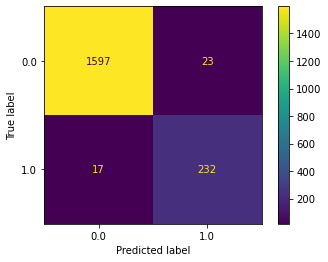

In [10]:
#GridsearchCV Polynomials
plot_confusion_matrix(tree, X_test, y_test)
plt.show()

In [11]:
Accuracy_nofilt =  tree.score(X_test,y_test)
Precision_nofilt = precision_score(y_test,tree.predict(X_test), average='macro')
Recall_nofilt = recall_score(y_test,tree.predict(X_test), average='macro')

print("Accuracy = " + str(Accuracy_nofilt))
print("Precision = " + str(Precision_nofilt))
print("Recall = " + str(Recall_nofilt))

Accuracy = 0.9785981808453719
Precision = 0.9496355419491216
Recall = 0.9587646883831623


# Export Data

Export the results in CSV format. Layout = Time,Action

In [12]:
#X_test['Action'] = tree.predict(X_test)
#df_results = pd.DataFrame(X_test)
#df_results.to_csv('Sprint_results_randomforest_Q4.csv')
#df_results